In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from resnet_models import create_resnet152_model, create_resnet152v2_model
import wandb
import os
from wandb.keras import WandbCallback

2023-03-15 22:12:00.715241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 22:12:00.790466: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 22:12:00.792278: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 22:12:00.792289: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

# Loading Data Set
Three sets are created: training, validation, and test. 
- Labels are generated based on the folder structure. Class name must correspond to the subfolder name.
- Loading in batches, of size 32, to reduce memory usage.
- Label mode is set to categorical, which means that the labels are encoded as a categorical vector.

Bilinear interploation is set to default. This specify the method used in the resizing procedure. By default aspect ratio is not perserved, i.e., the ratio between image width and height.

One hot encoding is utilized when label mode is set to categorical.


The image load documentation is available [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) and an example is available [here](https://keras.io/api/data_loading/image/).

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="dataset/train",
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    batch_size=32,
    image_size=(224, 224)
    )
val_ds = keras.utils.image_dataset_from_directory(
    directory="dataset/val",
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    batch_size=32,
    image_size=(224, 224)
    )
test_ds = keras.utils.image_dataset_from_directory(
    directory="dataset/test",
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    batch_size= 32,
    image_size=(224, 224)
    )

Found 297792 files belonging to 12 classes.


2023-03-15 22:12:12.150662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 22:12:12.150679: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 22:12:12.150691: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brothel69): /proc/driver/nvidia/version does not exist
2023-03-15 22:12:12.150875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 37219 files belonging to 12 classes.
Found 37235 files belonging to 12 classes.


# Visualizing the Data

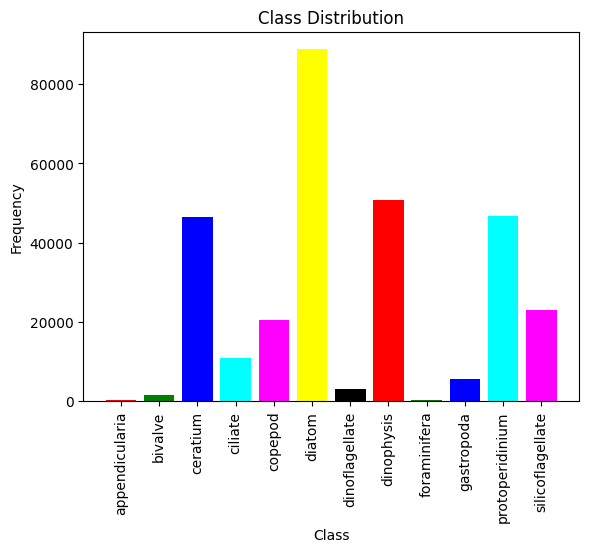

In [3]:
# histogram of class distribution in the data set
# remove underscores from class names
class_dist = {class_name.replace('_', ' ') : 0 for class_name in train_ds.class_names}
for label in os.listdir("dataset/train"):
    class_dist[label.replace('_', ' ')] = len(os.listdir(os.path.join("dataset/train/", label)))

# plot the histogram
plt.bar(class_dist.keys(), class_dist.values(), color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [4]:
# percentage of each class in the data set
for label, count in zip(class_dist.keys(), class_dist.values()):
    print(f'{label}: {count/sum(class_dist.values())*100:.2f}%')

appendicularia: 0.08%
bivalve: 0.56%
ceratium: 15.59%
ciliate: 3.64%
copepod: 6.85%
diatom: 29.81%
dinoflagellate: 1.05%
dinophysis: 17.01%
foraminifera: 0.12%
gastropoda: 1.89%
protoperidinium: 15.65%
silicoflagellate: 7.76%


# ResNet152V1

In [6]:
# initialize wandb
wandb.init(project="ResNet", config={"learning_rate": 0.001, "epochs": 30, "verbose": 1,"name": "ResNet152V1", "architecture": "ResNet152V1"})

# configs
cfg = wandb.config

# create the model
model = create_resnet152_model(len(train_ds.class_names))

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: gabri-torland (nubs). Use `wandb login --relogin` to force relogin


234698864/234698864 [==============================] - 11s 0us/step


In [ ]:
# list of callbacks
callbacks = [
            WandbCallback(mode="min", monitor="val_loss", save_graph=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001),
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
          ]

In [ ]:
model.fit(train_ds, epochs=cfg.epochs, batch_size=32, verbose=cfg.verbose, validation_data=val_ds, callbacks=callbacks) # train the model

In [ ]:
wandb.finish()

# ResNet152V2

In [ ]:
# initialize wandb
wandb.init(project="ResNet", config={"learning_rate": 0.001, "epochs": 30, "verbose": 1,"name": "ResNet152V2", "architecture": "ResNet152V2"})

# configs
cfg = wandb.config

# create the model
model = create_resnet152v2_model(len(train_ds.class_names))

In [ ]:
model.fit(train_ds, epochs=cfg.epochs, batch_size=32, verbose=cfg.verbose, validation_data=val_ds, callbacks=callbacks) # train the model

In [ ]:
wandb.finish()